## The Nigerian Funk and Soul Groove Selector

# Introduction

People are needlessly suffering the consequences of thier own poor taste in music. Wasting their lives listening to other things when they could be living life to the full with Nigerian 70s Funk and Soul as the soundtrack. 

This app aims to improve world happiness levels by asking for the favourite song of a user and then either a) if their choice is in our top 100 approved Nigerian classics, outputting a congratulatory message b) if their choice is not in the list, ouputting a recommmended song from Nigerian 70s funk and soul playlist on spotify that has some similar attributes to the song they chose


#### importing a big list of songs with characteristics. 

becasue the spotify method required long downlaod times, I decided to just find a list of songs with speed details. Then grade that tempo (slow, med, fast) and match it to a similarly paced Nigerian funk tune. 

Using Beautiful Soup was not the right way to scape this site. Becasue it was already a simple table in html it was better to use the pandas function read_html - 

So the first bit didnt work. But with Panda's got the table direct

#### Next Steps

Need to create a function that finds the tune selected in the list form ubc, then outputs a speed classifcation, which we then use to find a similarly graded Nigerian Funk Tune - at random 

In [ ]:
#def recommender():
    #from random import randint
    #input from user
    #song_choice=input("What song do you like right now?")
    #if len(song_choice)==0:
        #print("it looks like you cant think of a song at the moment")
    #else: 
        #song_choice_l=song_choice.lower() #convert input to lowercase
        #filter_song=top_100[(top_100["title"].str.lower()).str.contains(song_choice_l)]# convert target to lowercase
        #check if its in the list we have
        #if len(filter_song) ==0:
            #print("that song is not hot, sorry")

        #else:
            # if song is in billboard hot 100, confirm it, recommend another random hot song
            #print("That's a hot song.")
            #random_song = randint(0, len(top_100)-1)
            #print("You might also like " + top_100["title"][random_song] + " by " + top_100["performed_by"][random_song])
            

## Importing Spotify and checking for similar songs

In [89]:
# import necessary spotipy tools
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import getpass

#connecct to api
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="c775f2fba4064b8d89a723f0eb3c4015",
                                                          client_secret="0a1f7dca5ce74bed98f584a787308024"))

In [ ]:
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

### Playlists to Data Frame

We will get the audio features of two playlists:

**70s Nigerian funk and soul (named seventiesfunk)**

Playlist link:
https://open.spotify.com/playlist/5Hnm8iYvXNUEUDXm5cmLBV?si=6b6766865232490a

From that this is the ID: **5Hnm8iYvXNUEUDXm5cmLBV**

**Soul Train 70s Disco and Funk (named soultrain)**

Playlist link:
https://open.spotify.com/playlist/77VyThCnZyVXifJqBRWrYm
    
From that this is the ID: **77VyThCnZyVXifJqBRWrYm**

In [135]:
playlist = sp.user_playlist_tracks("djlarras", "5Hnm8iYvXNUEUDXm5cmLBV")

In [136]:
len(playlist['items'])

25

In [137]:
seventiesfunk = []
for item in playlist['items']:
    seventiesfunk.append(item['track']['id'])

In [138]:
seventiesfunk

['05tplGwKpP4IBsxl9YVmqT',
 '5IxcHoFKH6BUbyxNloo7wA',
 '4APa6zmDf879PH0pEpCbut',
 '4QU8y1okxp6BCfsr4jkoTT',
 '0kvBXRTNvyLRNO3yGh3Gpo',
 '25MqHSPDiiXWlKa6iQKCpV',
 '1uJWClfwqs6kpvzPPvLu4n',
 '6yM82PxMywRHehdoQgQT8p',
 '3OtnM8u83bnl00TYwF3sWC',
 '5AarKoTInrX0cN9CsRRFWA',
 '5mpjIvDq4cgQFyZviKwSRP',
 '3tGxWRKRtJ7PbZKodKeX38',
 '4PCW6nxrT9qxet5scL7T1L',
 '4qjPqmHjPr17SxXD4yTGUR',
 '7lXMbCKIASfEK0OMOUPaz3',
 '6RbzqgaaGoKPGXVhD54N5N',
 '5gw1ST3f229kOxYSs2In15',
 '72gReM7OIHX7IbHjmg5bY1',
 '49l7ls7T8hWDFxLo6u9Cxj',
 '4G0kl0gSf1kLcTmpRj1EAN',
 '1w95kCIRyAeHcoCRGOH5ma',
 '2cdWCJGTqyVCaURgMD29rM',
 '43ile6cBzr9uaC4bJf6J3N',
 '3DzeFKf8A5Fvt4m848Mnae',
 '4KQ5vTPl7hTu2fyVcO95XS']

In [139]:
# these are the audio features for all songs in the playlist
sp.audio_features(tracks=seventiesfunk)

[{'danceability': 0.628,
  'energy': 0.542,
  'key': 1,
  'loudness': -11.973,
  'mode': 0,
  'speechiness': 0.32,
  'acousticness': 0.553,
  'instrumentalness': 2.58e-05,
  'liveness': 0.372,
  'valence': 0.824,
  'tempo': 107.389,
  'type': 'audio_features',
  'id': '05tplGwKpP4IBsxl9YVmqT',
  'uri': 'spotify:track:05tplGwKpP4IBsxl9YVmqT',
  'track_href': 'https://api.spotify.com/v1/tracks/05tplGwKpP4IBsxl9YVmqT',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/05tplGwKpP4IBsxl9YVmqT',
  'duration_ms': 256301,
  'time_signature': 4},
 {'danceability': 0.601,
  'energy': 0.711,
  'key': 0,
  'loudness': -10.698,
  'mode': 1,
  'speechiness': 0.106,
  'acousticness': 0.136,
  'instrumentalness': 0.00187,
  'liveness': 0.249,
  'valence': 0.929,
  'tempo': 119.385,
  'type': 'audio_features',
  'id': '5IxcHoFKH6BUbyxNloo7wA',
  'uri': 'spotify:track:5IxcHoFKH6BUbyxNloo7wA',
  'track_href': 'https://api.spotify.com/v1/tracks/5IxcHoFKH6BUbyxNloo7wA',
  'analysis_url': 'https:

In [140]:
seventiesfunk = pd.DataFrame(sp.audio_features(tracks=seventiesfunk))

In [141]:
seventiesfunk.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [142]:
seventiesfunk.shape

(25, 18)

In [143]:
seventiesfunk.head(120)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.628,0.542,1,-11.973,0,0.3200,0.5530,0.000026,0.3720,0.824,107.389,audio_features,05tplGwKpP4IBsxl9YVmqT,spotify:track:05tplGwKpP4IBsxl9YVmqT,https://api.spotify.com/v1/tracks/05tplGwKpP4I...,https://api.spotify.com/v1/audio-analysis/05tp...,256301,4
1,0.601,0.711,0,-10.698,1,0.1060,0.1360,0.001870,0.2490,0.929,119.385,audio_features,5IxcHoFKH6BUbyxNloo7wA,spotify:track:5IxcHoFKH6BUbyxNloo7wA,https://api.spotify.com/v1/tracks/5IxcHoFKH6BU...,https://api.spotify.com/v1/audio-analysis/5Ixc...,292680,4
2,0.725,0.655,1,-6.712,1,0.0409,0.7150,0.136000,0.2830,0.740,108.411,audio_features,4APa6zmDf879PH0pEpCbut,spotify:track:4APa6zmDf879PH0pEpCbut,https://api.spotify.com/v1/tracks/4APa6zmDf879...,https://api.spotify.com/v1/audio-analysis/4APa...,204213,4
3,0.680,0.748,1,-7.937,1,0.0584,0.4490,0.129000,0.0705,0.968,108.428,audio_features,4QU8y1okxp6BCfsr4jkoTT,spotify:track:4QU8y1okxp6BCfsr4jkoTT,https://api.spotify.com/v1/tracks/4QU8y1okxp6B...,https://api.spotify.com/v1/audio-analysis/4QU8...,498973,4
4,0.703,0.699,5,-7.111,0,0.0633,0.7430,0.046900,0.0986,0.910,108.687,audio_features,0kvBXRTNvyLRNO3yGh3Gpo,spotify:track:0kvBXRTNvyLRNO3yGh3Gpo,https://api.spotify.com/v1/tracks/0kvBXRTNvyLR...,https://api.spotify.com/v1/audio-analysis/0kvB...,330707,4
5,0.727,0.732,1,-9.252,1,0.0574,0.6950,0.180000,0.1040,0.856,116.093,audio_features,25MqHSPDiiXWlKa6iQKCpV,spotify:track:25MqHSPDiiXWlKa6iQKCpV,https://api.spotify.com/v1/tracks/25MqHSPDiiXW...,https://api.spotify.com/v1/audio-analysis/25Mq...,180294,4
6,0.670,0.877,9,-5.907,1,0.0583,0.6050,0.015900,0.1190,0.734,118.973,audio_features,1uJWClfwqs6kpvzPPvLu4n,spotify:track:1uJWClfwqs6kpvzPPvLu4n,https://api.spotify.com/v1/tracks/1uJWClfwqs6k...,https://api.spotify.com/v1/audio-analysis/1uJW...,307107,4
7,0.718,0.626,10,-9.049,0,0.0604,0.1470,0.002070,0.0994,0.662,107.288,audio_features,6yM82PxMywRHehdoQgQT8p,spotify:track:6yM82PxMywRHehdoQgQT8p,https://api.spotify.com/v1/tracks/6yM82PxMywRH...,https://api.spotify.com/v1/audio-analysis/6yM8...,203040,4
8,0.804,0.795,10,-6.645,0,0.0913,0.1180,0.738000,0.0593,0.858,98.905,audio_features,3OtnM8u83bnl00TYwF3sWC,spotify:track:3OtnM8u83bnl00TYwF3sWC,https://api.spotify.com/v1/tracks/3OtnM8u83bnl...,https://api.spotify.com/v1/audio-analysis/3Otn...,473400,4
9,0.751,0.859,5,-6.791,0,0.0446,0.7130,0.265000,0.3040,0.656,123.945,audio_features,5AarKoTInrX0cN9CsRRFWA,spotify:track:5AarKoTInrX0cN9CsRRFWA,https://api.spotify.com/v1/tracks/5AarKoTInrX0...,https://api.spotify.com/v1/audio-analysis/5Aar...,463702,4


In [144]:
seventiesfunk = seventiesfunk.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'],  axis=1)

In [145]:
X_sf = seventiesfunk

In [146]:
from sklearn.preprocessing import StandardScaler
X_prep_sf = StandardScaler().fit_transform(X_sf)

X_prep_sf_df = pd.DataFrame(X_prep_sf, columns = seventiesfunk.columns)


In [147]:
from sklearn.cluster import KMeans

kmeans_sf = KMeans(n_clusters=8, random_state=1234)

kmeans_sf.fit(X_prep_sf_df)

kmeans_sf.cluster_centers_

array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [148]:
# total inertia of all the centroids
kmeans_sf.inertia_

116.99424728589669

In [149]:
clusters_sf = kmeans_sf.predict(X_prep_sf)
clusters_sf

array([7, 1, 1, 2, 2, 1, 1, 0, 4, 2, 2, 3, 0, 2, 1, 4, 1, 1, 2, 0, 5, 6,
       6, 2, 1], dtype=int32)

In [150]:
pd.Series(clusters_sf).value_counts().sort_index()


0    3
1    8
2    7
3    1
4    2
5    1
6    2
7    1
dtype: int64

In [151]:
kmeans_sf.cluster_centers_


array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [152]:
X_sf_df = pd.DataFrame(X_sf)
X_sf_df['cluster'] = clusters_sf
X_sf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.628,0.542,1,-11.973,0,0.3200,0.553,0.000026,0.3720,0.824,107.389,256301,4,7
1,0.601,0.711,0,-10.698,1,0.1060,0.136,0.001870,0.2490,0.929,119.385,292680,4,1
2,0.725,0.655,1,-6.712,1,0.0409,0.715,0.136000,0.2830,0.740,108.411,204213,4,1
3,0.680,0.748,1,-7.937,1,0.0584,0.449,0.129000,0.0705,0.968,108.428,498973,4,2
4,0.703,0.699,5,-7.111,0,0.0633,0.743,0.046900,0.0986,0.910,108.687,330707,4,2


In [171]:
#getting ids doesn't work
X_sf_df['id'] = seventiesfunk['id']

KeyError: 'id'

<AxesSubplot:ylabel='Frequency'>

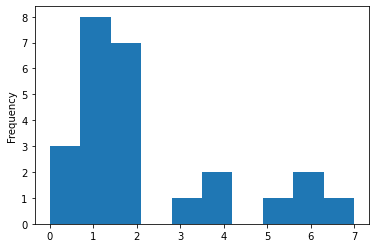

In [153]:
X_sf_df['cluster'].plot(kind='hist')

In [154]:
soultrain = []
for item in playlist['items']:
    soultrain.append(item['track']['id'])

In [155]:
soultrain

['05tplGwKpP4IBsxl9YVmqT',
 '5IxcHoFKH6BUbyxNloo7wA',
 '4APa6zmDf879PH0pEpCbut',
 '4QU8y1okxp6BCfsr4jkoTT',
 '0kvBXRTNvyLRNO3yGh3Gpo',
 '25MqHSPDiiXWlKa6iQKCpV',
 '1uJWClfwqs6kpvzPPvLu4n',
 '6yM82PxMywRHehdoQgQT8p',
 '3OtnM8u83bnl00TYwF3sWC',
 '5AarKoTInrX0cN9CsRRFWA',
 '5mpjIvDq4cgQFyZviKwSRP',
 '3tGxWRKRtJ7PbZKodKeX38',
 '4PCW6nxrT9qxet5scL7T1L',
 '4qjPqmHjPr17SxXD4yTGUR',
 '7lXMbCKIASfEK0OMOUPaz3',
 '6RbzqgaaGoKPGXVhD54N5N',
 '5gw1ST3f229kOxYSs2In15',
 '72gReM7OIHX7IbHjmg5bY1',
 '49l7ls7T8hWDFxLo6u9Cxj',
 '4G0kl0gSf1kLcTmpRj1EAN',
 '1w95kCIRyAeHcoCRGOH5ma',
 '2cdWCJGTqyVCaURgMD29rM',
 '43ile6cBzr9uaC4bJf6J3N',
 '3DzeFKf8A5Fvt4m848Mnae',
 '4KQ5vTPl7hTu2fyVcO95XS']

In [156]:
# these are the audio features for all songs in the playlist
sp.audio_features(tracks=soultrain)

[{'danceability': 0.628,
  'energy': 0.542,
  'key': 1,
  'loudness': -11.973,
  'mode': 0,
  'speechiness': 0.32,
  'acousticness': 0.553,
  'instrumentalness': 2.58e-05,
  'liveness': 0.372,
  'valence': 0.824,
  'tempo': 107.389,
  'type': 'audio_features',
  'id': '05tplGwKpP4IBsxl9YVmqT',
  'uri': 'spotify:track:05tplGwKpP4IBsxl9YVmqT',
  'track_href': 'https://api.spotify.com/v1/tracks/05tplGwKpP4IBsxl9YVmqT',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/05tplGwKpP4IBsxl9YVmqT',
  'duration_ms': 256301,
  'time_signature': 4},
 {'danceability': 0.601,
  'energy': 0.711,
  'key': 0,
  'loudness': -10.698,
  'mode': 1,
  'speechiness': 0.106,
  'acousticness': 0.136,
  'instrumentalness': 0.00187,
  'liveness': 0.249,
  'valence': 0.929,
  'tempo': 119.385,
  'type': 'audio_features',
  'id': '5IxcHoFKH6BUbyxNloo7wA',
  'uri': 'spotify:track:5IxcHoFKH6BUbyxNloo7wA',
  'track_href': 'https://api.spotify.com/v1/tracks/5IxcHoFKH6BUbyxNloo7wA',
  'analysis_url': 'https:

In [157]:
soultrain = pd.DataFrame(sp.audio_features(tracks=soultrain))

In [158]:
soultrain.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [159]:
soultrain.shape

(25, 18)

In [160]:
soultrain.head(120)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.628,0.542,1,-11.973,0,0.3200,0.5530,0.000026,0.3720,0.824,107.389,audio_features,05tplGwKpP4IBsxl9YVmqT,spotify:track:05tplGwKpP4IBsxl9YVmqT,https://api.spotify.com/v1/tracks/05tplGwKpP4I...,https://api.spotify.com/v1/audio-analysis/05tp...,256301,4
1,0.601,0.711,0,-10.698,1,0.1060,0.1360,0.001870,0.2490,0.929,119.385,audio_features,5IxcHoFKH6BUbyxNloo7wA,spotify:track:5IxcHoFKH6BUbyxNloo7wA,https://api.spotify.com/v1/tracks/5IxcHoFKH6BU...,https://api.spotify.com/v1/audio-analysis/5Ixc...,292680,4
2,0.725,0.655,1,-6.712,1,0.0409,0.7150,0.136000,0.2830,0.740,108.411,audio_features,4APa6zmDf879PH0pEpCbut,spotify:track:4APa6zmDf879PH0pEpCbut,https://api.spotify.com/v1/tracks/4APa6zmDf879...,https://api.spotify.com/v1/audio-analysis/4APa...,204213,4
3,0.680,0.748,1,-7.937,1,0.0584,0.4490,0.129000,0.0705,0.968,108.428,audio_features,4QU8y1okxp6BCfsr4jkoTT,spotify:track:4QU8y1okxp6BCfsr4jkoTT,https://api.spotify.com/v1/tracks/4QU8y1okxp6B...,https://api.spotify.com/v1/audio-analysis/4QU8...,498973,4
4,0.703,0.699,5,-7.111,0,0.0633,0.7430,0.046900,0.0986,0.910,108.687,audio_features,0kvBXRTNvyLRNO3yGh3Gpo,spotify:track:0kvBXRTNvyLRNO3yGh3Gpo,https://api.spotify.com/v1/tracks/0kvBXRTNvyLR...,https://api.spotify.com/v1/audio-analysis/0kvB...,330707,4
5,0.727,0.732,1,-9.252,1,0.0574,0.6950,0.180000,0.1040,0.856,116.093,audio_features,25MqHSPDiiXWlKa6iQKCpV,spotify:track:25MqHSPDiiXWlKa6iQKCpV,https://api.spotify.com/v1/tracks/25MqHSPDiiXW...,https://api.spotify.com/v1/audio-analysis/25Mq...,180294,4
6,0.670,0.877,9,-5.907,1,0.0583,0.6050,0.015900,0.1190,0.734,118.973,audio_features,1uJWClfwqs6kpvzPPvLu4n,spotify:track:1uJWClfwqs6kpvzPPvLu4n,https://api.spotify.com/v1/tracks/1uJWClfwqs6k...,https://api.spotify.com/v1/audio-analysis/1uJW...,307107,4
7,0.718,0.626,10,-9.049,0,0.0604,0.1470,0.002070,0.0994,0.662,107.288,audio_features,6yM82PxMywRHehdoQgQT8p,spotify:track:6yM82PxMywRHehdoQgQT8p,https://api.spotify.com/v1/tracks/6yM82PxMywRH...,https://api.spotify.com/v1/audio-analysis/6yM8...,203040,4
8,0.804,0.795,10,-6.645,0,0.0913,0.1180,0.738000,0.0593,0.858,98.905,audio_features,3OtnM8u83bnl00TYwF3sWC,spotify:track:3OtnM8u83bnl00TYwF3sWC,https://api.spotify.com/v1/tracks/3OtnM8u83bnl...,https://api.spotify.com/v1/audio-analysis/3Otn...,473400,4
9,0.751,0.859,5,-6.791,0,0.0446,0.7130,0.265000,0.3040,0.656,123.945,audio_features,5AarKoTInrX0cN9CsRRFWA,spotify:track:5AarKoTInrX0cN9CsRRFWA,https://api.spotify.com/v1/tracks/5AarKoTInrX0...,https://api.spotify.com/v1/audio-analysis/5Aar...,463702,4


In [161]:
soultrain = soultrain.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'],  axis=1)

In [162]:
X = soultrain

In [163]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

X_prep_df = pd.DataFrame(X_prep, columns = soultrain.columns)


In [164]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=1234)

kmeans.fit(X_prep_df)

kmeans.cluster_centers_

array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [165]:
# total inertia of all the centroids
kmeans.inertia_


116.99424728589669

In [166]:
clusters = kmeans.predict(X_prep)
clusters

array([7, 1, 1, 2, 2, 1, 1, 0, 4, 2, 2, 3, 0, 2, 1, 4, 1, 1, 2, 0, 5, 6,
       6, 2, 1], dtype=int32)

In [167]:
pd.Series(clusters).value_counts().sort_index()


0    3
1    8
2    7
3    1
4    2
5    1
6    2
7    1
dtype: int64

In [168]:
kmeans.cluster_centers_


array([[-0.41469456,  0.11043345,  1.53183788, -0.27616101, -0.88640526,
        -0.52707234, -0.74387921,  0.25410258, -0.61670935, -2.10967081,
        -0.6485443 , -0.4599714 ,  0.20412415],
       [-0.36023309, -0.14940135, -0.59322927, -0.10503329,  1.12815215,
        -0.52981849,  0.04882579, -0.28107271,  0.06260317,  0.17328268,
         0.15545496, -0.65068075,  0.20412415],
       [ 0.21372143,  0.22921508, -0.14265112, -0.13406016, -0.59861134,
         0.12151805,  0.35313855, -0.27894998,  0.05745027,  0.52145978,
         0.31208123,  0.66206074,  0.20412415],
       [-0.83463842, -0.47218205, -0.79455142,  0.18652946,  1.12815215,
         1.11593873,  0.91449076, -0.58711031,  1.19899771, -0.22448641,
         3.29814688, -0.22255864, -4.89897949],
       [ 1.29132737,  0.9111638 ,  0.95024056,  1.34394299, -0.88640526,
         0.07333953, -0.61248209,  2.83878262,  0.60896462,  0.53850702,
        -0.8108502 ,  0.9180708 ,  0.20412415],
       [ 2.7243858 , -2.843632

In [169]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.628,0.542,1,-11.973,0,0.3200,0.553,0.000026,0.3720,0.824,107.389,256301,4,7
1,0.601,0.711,0,-10.698,1,0.1060,0.136,0.001870,0.2490,0.929,119.385,292680,4,1
2,0.725,0.655,1,-6.712,1,0.0409,0.715,0.136000,0.2830,0.740,108.411,204213,4,1
3,0.680,0.748,1,-7.937,1,0.0584,0.449,0.129000,0.0705,0.968,108.428,498973,4,2
4,0.703,0.699,5,-7.111,0,0.0633,0.743,0.046900,0.0986,0.910,108.687,330707,4,2


<AxesSubplot:ylabel='Frequency'>

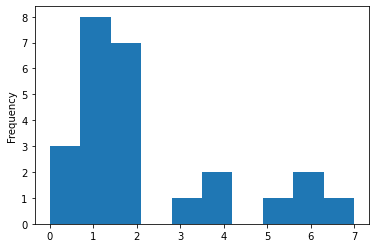

In [170]:
X_df['cluster'].plot(kind='hist')

Text(0, 0.5, 'inertia')

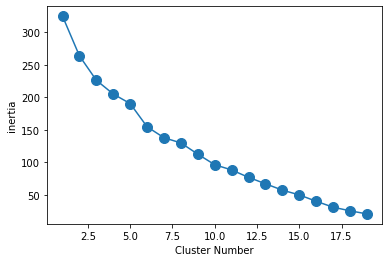

In [127]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
#def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    #kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    #kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    #return kmeans.inertia_

# Plot for a range of cluster numbers
#import matplotlib.pyplot as plt

#cluster_range = range(1,20)

#plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
#plt.xlabel('Cluster Number')
#plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

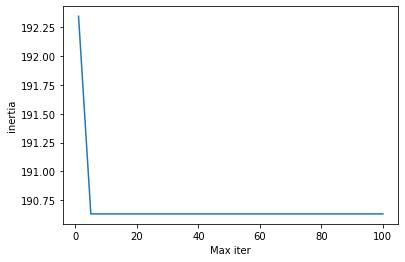

In [128]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
#def get_kmeans_ineratia_varying_max_iter(max_iter):
    #kmeans = KMeans(n_clusters=5,
                    #random_state=1234,
                    #n_init=3,
                    #algorithm='elkan',
                    #max_iter=max_iter,
                   )
    #kmeans.fit(X_prep_df)

    #return kmeans.inertia_

#max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

#plt.plot(max_iter_list,
         #[get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
#plt.xlabel('Max iter')
#plt.ylabel('inertia')

In [129]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0, 0.5, 'silhouette score')

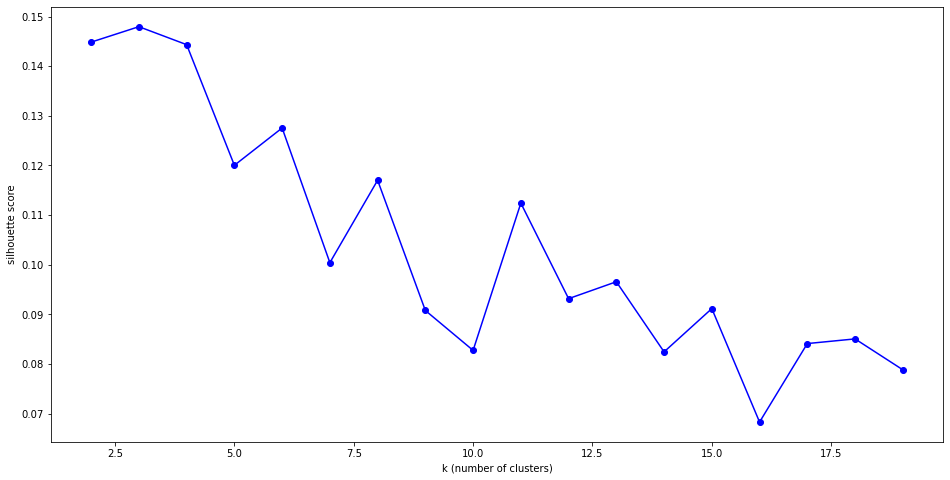

In [130]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

In [131]:
kmeans = KMeans(n_clusters=3,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 2], dtype=int32)

In [132]:
clusters.shape


(25,)

In [133]:
#songs_clustered = pd.DataFrame(X_prep, columns = soultrain.columns)


ValueError: Shape of passed values is (25, 13), indices imply (25, 14)

In [ ]:
#songs_clustered['cluster_id'] = clusters


In [ ]:
#songs_clustered.head()


In [ ]:
#songs_clustered['cluster_id'].value_counts()


In [ ]:
#kmeans.cluster_centers_


In [ ]:
#cluster_centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=soultrain.columns)


In [ ]:
#cluster_centers_df


In [ ]:
#cluster_centers_df['cluster_id'] = range(0,3)


In [ ]:
#cluster_centers_df

In [ ]:
# this contains my cluster centers
#cluster_center_sub_df = cluster_centers_df[['alcohol', 'color_intensity', 'cluster_id']]

# this cointains my datapoints with the determined
#wines_clustered_sub_df= wines_clustered[['alcohol', 'color_intensity', 'cluster_id']]

In [ ]:
#cluster_center_sub_df

In [ ]:
#wines_clustered_sub_df

In [ ]:
#import seaborn as sns

#sns.scatterplot(data=wines_clustered_sub_df,
               x='alcohol',
               y='color_intensity',
               hue='cluster_id')

# plot centroids
#sns.scatterplot(data=cluster_center_sub_df,
               x="alcohol",
               y="color_intensity",
               hue='cluster_id',
                legend=False,
                # marker=u'8',
                marker='+',
                s=500,
               )